# Exam Project: The formation of ISIS' Social Media Network
Group members: Zeyu Zhao, Helge Zille, Edith Zink, Sina Smid

**This Notebook prepares the tweets for the text analysis and contains**

**1. Preprocessing of tweets - data cleaning:**
- Prepare a preprocessed and clean `tweets` column for text analysis

**2. Descriptive: word frequencies**:
- Top 25 words with and without stop-words
- Wordclouds with and without stop-words
- Wordtrees
- Chi-squared (word co-occurence - used to identify words that are co-located)
- TF-IDF 

**3. Tokenization**:
- Method 1: Word split using NLTK
- Method 2: Sentiment analysis
- Method 3: Deepmoji analysis 

In [66]:
import os
import requests
import re
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
plt.style.use('ggplot')
import datetime
import wordcloud
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
# NLTK 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import bigrams 
from textblob import TextBlob # pip install -U textblob
# Functions
from our_functions import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ss.egb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ss.egb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Data import:** 
- Dataset is downloaded from Kaggle (https://www.kaggle.com/fifthtribe/how-isis-uses-twitter)

In [67]:
data = read_tweets('tweets_1.csv')
data

,name,username,description,location,followers,numberstatuses,time,tweets,date,translated
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:07:00,'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...,2015-01-06,True
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:27:00,SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...,2015-01-06,True
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:29:00,FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...,2015-01-06,True
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:37:00,"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...",2015-01-06,True
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:45:00,AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...,2015-01-06,True
5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:51:00,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,2015-01-06,False
6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:04:00,OH MURABIT! : http://t.co/hujLj9KGkG http://t...,2015-01-06,True
7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:06:00,'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...,2015-01-06,True
8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:17:00,Aslm Please share our new account after the pr...,2015-01-06,False
9,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-10 00:05:00,AQAP STATEMENT REGARDING THE BLESSED RAID IN ...,2015-01-10,True


In [68]:
# Overview on all tweets (to see what needs to be cleaned):
terms_single = set(data['tweets'])
terms_single

{'Sh. Anwar Al Awlaki(Rahimahullah)\n#Greenbird https://t.co/aNG5gDOy7U',
 'JN released Q&amp;A about hijra to their 3 villages emirate &amp; dared to speak abt covenant\n\nRead: https://t.co/ngFnr31eqZ https://t.co/OXcjiEIvOf',
 'RT @RevolutionSyria: Such a “caring” world that cares about ruins but not the hundreds of thousands of Assad’s victims!! #Palmyra #Syria ht…',
 "nahh pieter... they're coolhead. Words like this more expressing to joy, not angry. https://t.co/62ud5xgiJl",
 'RT @Nidalgazaui: ISIS Captured 3 #SAA army positions in #DeirEzzor in #Syria...',
 "@CelticMuslim You lack political &amp; geopolitical knowledge if you think US needs anyone's permission to involve itself in another country.",
 'RT @IraqSurveys: US is destroying suni areas systemaically under the banner of fighting ISIS. same as 91. 96 . 2003 .. just an excuse https…',
 '@Indepen_Patriot @CNN #ISIS exist all the time only waithing for the moment and started on 2014.',
 '#WilayatAlFurat\nThe establishment o

**1.Preprocessing**: Takes care of the following parts of the tweets:
- References: `@`
- Retweets: `RT`
- Hashtags to topics: `#`
- Links: `http\`

**STEP 1 Preprocessing **

In [69]:
# TO-DO What is about the \n??
# How to reasonable delete non-word characters?

# Create a new coloumn for preprocessed tweets
def extract_from_to_column(data, regex, from_col, to_col):
    data[to_col]=data[from_col].apply(lambda x: " ".join(regex.findall(x)))
    return data

def remove_from_body(data,regex):
    data['tweets_prepr']=data.tweets.apply(lambda x: re.sub(regex,'',x))
    return data

regex1 = re.compile("@(\S+)")   # tagged users
regex2 = re.compile("http\S+")  # urls
regex3 = re.compile("ENGLISH TRANS[^:]*:") # prefix
regex4 = re.compile("#(\S+)") # hashtags
regex5 = re.compile("RT\s") # retweets

data = extract_from_to_column(data, regex1, 'tweets', 'tags')
data = remove_from_body(data, regex1)

data = extract_from_to_column(data, regex2, 'tweets', 'links')
data = remove_from_body(data, regex2)

data = remove_from_body(data, regex3)

data = extract_from_to_column(data, regex4, 'tweets', 'hashtag')
data = remove_from_body(data, regex4)

data = extract_from_to_column(data, regex5, 'tweets', 'retweets')
data = remove_from_body(data, regex5)

data.tags = data.tags.str.split()
data.head(1000)

,name,username,description,location,followers,numberstatuses,time,tweets,date,translated,tags,tweets_prepr,links,hashtag,retweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:07:00,'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...,2015-01-06,True,[],'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...,http://t.co/73xFszsjvr http://t.co/x8BZcscXzq,,
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:27:00,SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...,2015-01-06,True,[],SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...,http://t.co/uqqzXGgVTz http://t.co/A7nbjwyHBr,,
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:29:00,FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...,2015-01-06,True,[],FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...,http://t.co/TgXT1GdGw7 http://t.co/ZuE8eisze6,,
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:37:00,"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...",2015-01-06,True,[],"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...",http://t.co/3qg5dKlIwr http://t.co/7bqk1wJAzC,,
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:45:00,AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...,2015-01-06,True,[],AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...,http://t.co/2EYm9EymTe,,
5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:51:00,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,2015-01-06,False,[],THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,http://t.co/EPaPRlph5W http://t.co/4VUYszairt,,
6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:04:00,OH MURABIT! : http://t.co/hujLj9KGkG http://t...,2015-01-06,True,[],OH MURABIT! : http://t.co/hujLj9KGkG http://t...,http://t.co/hujLj9KGkG http://t.co/t9IxMtBVGK,,
7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:06:00,'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...,2015-01-06,True,[],'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...,http://t.co/AJbayWNxDQ http://t.co/mAycbhaUzH,,
8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:17:00,Aslm Please share our new account after the pr...,2015-01-06,False,"[KhalidMaghrebi, seifulmaslul123, CheerLeadUni...",Aslm Please share our new account after the pr...,,,
9,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-10 00:05:00,AQAP STATEMENT REGARDING THE BLESSED RAID IN ...,2015-01-10,True,[],AQAP STATEMENT REGARDING THE BLESSED RAID IN ...,http://t.co/qvErFO25Qj http://t.co/YIcnGMVjiX,,


In [70]:
data['tweets_prepr'].head()

0     'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...
1     SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...
2     FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...
3     SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...
4     AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...
Name: tweets_prepr, dtype: object

**STEP 2 Preprocessing **

In [71]:
# Remove punctuations and additional signs in tweets_prepr column
data['tweets_prepr'] = data['tweets_prepr'].str.replace('[^\w\s]','')
data['tweets_prepr'].head()

0     A MESSAGE TO THE TRUTHFUL IN SYRIA  SHEIKH AB...
1     SHEIKH FATIH AL JAWLANI FOR THE PEOPLE OF INT...
2     FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...
3     SHEIKH NASIR AL WUHAYSHI HA LEADER OF AQAP TH...
4     AQAP RESPONSE TO SHEIKH BAGHDADIS STATEMENT A...
Name: tweets_prepr, dtype: object

**STEP 3 Preprocessing **

In [72]:
# Spelling corrections with textblob library
data['tweets_prepr'][:5].apply(lambda x: str(TextBlob(x).correct()))
data['tweets_prepr'].head()

0     A MESSAGE TO THE TRUTHFUL IN SYRIA  SHEIKH AB...
1     SHEIKH FATIH AL JAWLANI FOR THE PEOPLE OF INT...
2     FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...
3     SHEIKH NASIR AL WUHAYSHI HA LEADER OF AQAP TH...
4     AQAP RESPONSE TO SHEIKH BAGHDADIS STATEMENT A...
Name: tweets_prepr, dtype: object

**STEP 4 Preprocessing **

In [ ]:
# Stemm the words
# THIS RUNS SUPER SLOW - can someone else try?
#stemming = PorterStemmer()
#data['tweets_prepr'] = data['tweets_prepr'].apply(lambda x: ' '.join([stemming.stem(word) for word in data.tweets_prepr]))
#data['tweets_prepr'].head()

In [ ]:
# ALTERNATIVE
#NLTK provides several stemmer interfaces like Porter stemmer, #Lancaster Stemmer, Snowball Stemmer
#porter = PorterStemmer()
#stems = []
#for t in tweets_stop:    
#    stems.append(porter.stem(t))
#print(stems)
# IF we use this method, it needs to be added to the dataframe afterwards

**STEP 5 Preprocessing **

In [73]:
# lower capitalization
data['tweets_prepr'] = data['tweets_prepr'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))
data['tweets_prepr'].head()

0    a message to the truthful in syria sheikh abu ...
1    sheikh fatih al jawlani for the people of inte...
2    first audio meeting with sheikh fatih al jawla...
3    sheikh nasir al wuhayshi ha leader of aqap the...
4    aqap response to sheikh baghdadis statement al...
Name: tweets_prepr, dtype: object

**STEP 6 Preprocessing **

In [75]:
# Removing stop-words: Create new column in data - without stopwords
stop = stopwords.words('english')

data['tweets_prepr_stop'] = data['tweets_prepr'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['tweets_prepr_stop'].head()

0    message truthful syria sheikh abu muhammed al ...
1    sheikh fatih al jawlani people integrity sacri...
2    first audio meeting sheikh fatih al jawlani ha...
3    sheikh nasir al wuhayshi ha leader aqap promis...
4    aqap response sheikh baghdadis statement altho...
Name: tweets_prepr_stop, dtype: object

**STEP 7 Preprocessing **

In [76]:
# Remove words less than three letters
data['tweets_prepr_stop'] = data['tweets_prepr_stop'].apply(lambda x: ' '.join([word for word in x.split() if len(word) >= 3]))
data['tweets_prepr_stop'].head()

0    message truthful syria sheikh abu muhammed maq...
1    sheikh fatih jawlani people integrity sacrific...
2    first audio meeting sheikh fatih jawlani httpt...
3    sheikh nasir wuhayshi leader aqap promise vict...
4    aqap response sheikh baghdadis statement altho...
Name: tweets_prepr_stop, dtype: object

**STEP 8 Preprocessing **

In [77]:
# lemmatize
lmtzr = WordNetLemmatizer()
data['tweets_prepr_stop'] = data['tweets_prepr_stop'].apply(lambda x: ' '.join([lmtzr.lemmatize(word) for word in x.split()]))
data['tweets_prepr_stop'].head()

0    message truthful syria sheikh abu muhammed maq...
1    sheikh fatih jawlani people integrity sacrific...
2    first audio meeting sheikh fatih jawlani httpt...
3    sheikh nasir wuhayshi leader aqap promise vict...
4    aqap response sheikh baghdadis statement altho...
Name: tweets_prepr_stop, dtype: object

**2. Descriptive: Word Frequencies**

**Word frequencies **

In [27]:
# get most common words (original column)
all_words = []
for line in list(data['tweets']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(25)

[('the', 7452),
 ('in', 6612),
 ('of', 5929),
 ('rt', 5851),
 ('to', 4202),
 ('and', 3424),
 ('a', 2967),
 ('is', 2759),
 ('on', 1735),
 ('by', 1695),
 ('for', 1518),
 ('#isis', 1488),
 ('with', 1363),
 ('&amp;', 1352),
 ('from', 1283),
 ('are', 1227),
 ('you', 1218),
 ('killed', 1185),
 ('they', 1139),
 ('#syria', 1059),
 ('that', 967),
 ('this', 943),
 ('army', 849),
 ('it', 800),
 ('was', 763)]

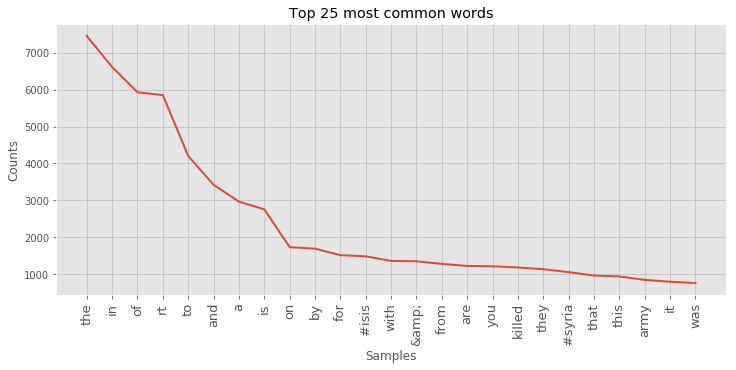

Text(0.5, 1.0, 'log-log plot of words frequency')

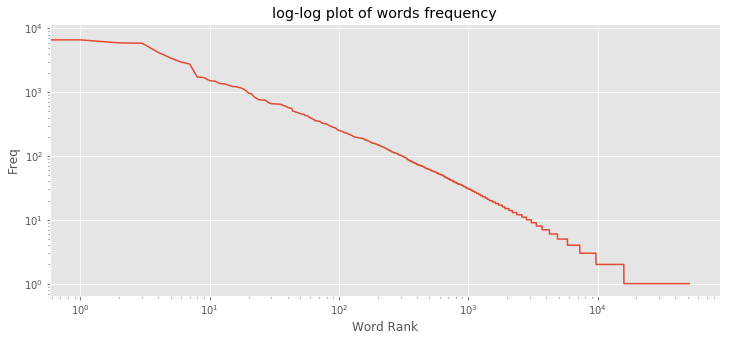

In [28]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

**Note**:
- The word distribution present in this data dictionary is a very common phenomenon in large samples of words as shown by Zipf’s law where the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, etc. (see: https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb)

In [29]:
# get most common words (preprocessed tweet column)
all_words = []
for line in list(data['tweets_prepr_stop']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(25)

[('isi', 2382),
 ('syria', 1541),
 ('amp', 1359),
 ('killed', 1293),
 ('army', 940),
 ('http', 914),
 ('state', 723),
 ('attack', 696),
 ('islamic', 687),
 ('aleppo', 646),
 ('iraq', 642),
 ('soldier', 632),
 ('syrian', 613),
 ('allah', 610),
 ('assad', 587),
 ('today', 580),
 ('ramiallolah', 578),
 ('force', 576),
 ('near', 575),
 ('iraqi', 572),
 ('breaking', 559),
 ('muslim', 556),
 ('city', 497),
 ('one', 477),
 ('fighter', 451)]

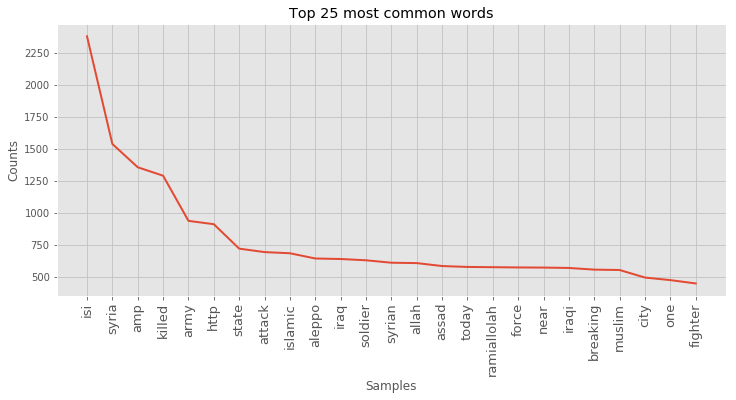

In [30]:
# plot word frequency distribution of first few words after preprocessing
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

**Wordclouds **

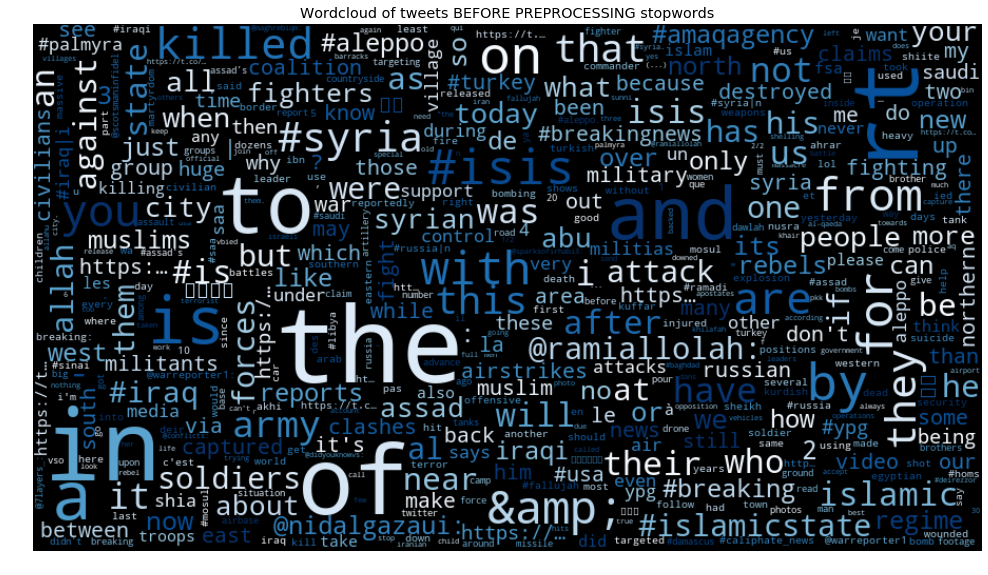

In [65]:
# get most common words (original column)
all_words = []
for line in list(data['tweets']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of tweets BEFORE preprocessing and stopwords")
plt.show()

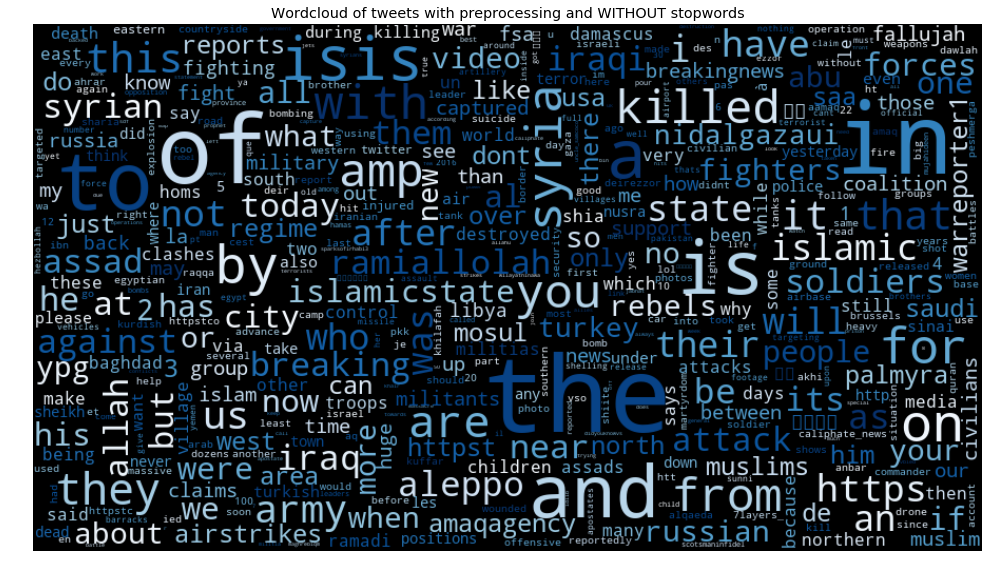

In [78]:
# get most common words (original column)
all_words = []
for line in list(data['tweets_prepr']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of tweets with preprocessing and WITHOUT stopwords")
plt.show()

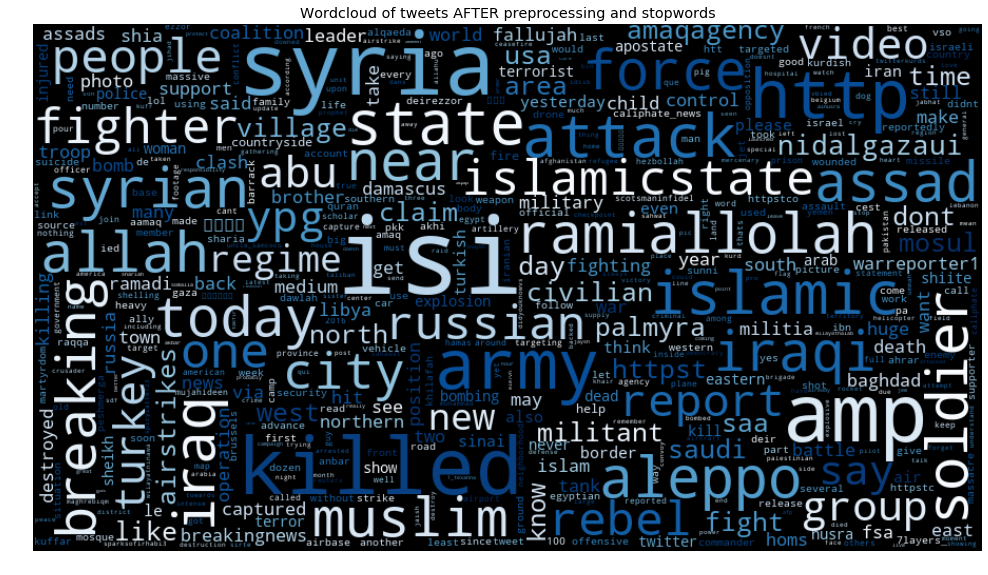

In [79]:
# get most common words (original column)
all_words = []
for line in list(data['tweets_prepr_stop']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of tweets AFTER preprocessing and stopwords")
plt.show()

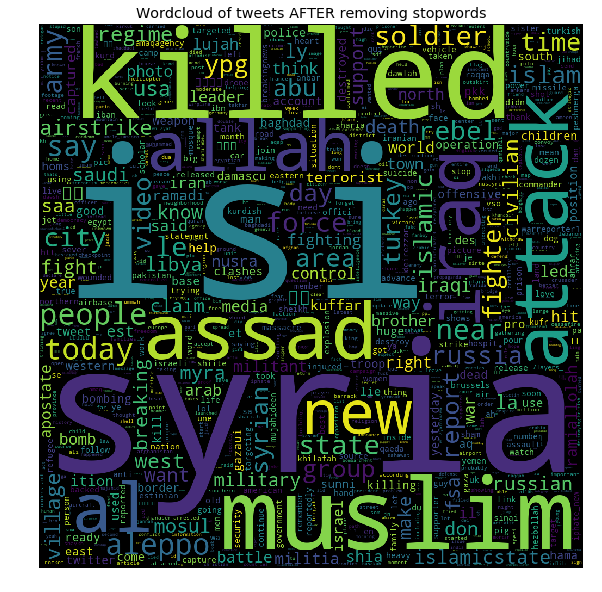

In [33]:
# THIS WORDCLOUD USES TF-IDF VECTORIZER

# remove junk from tweets
junk = re.compile("al|RT|\n|&.*?;|http[s](?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)*")
tweets = [junk.sub(" ", t) for t in data.tweets]

# remove stop words from tweets
vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=.5)
tfv = vec.fit_transform(tweets)

terms = vec.get_feature_names()
wc = WordCloud(height=1000, width=1000, max_words=1000).generate(" ".join(terms))

plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis("off")
plt.title("Wordcloud of tweets AFTER removing stopwords")
plt.show()

**Wordtrees **

**Term co-occurence: Chi-squared **

In [ ]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

**TF-IDF:** In the next part, I played around with the data following guidance from this blogpost online: https://sigdelta.com/blog/text-analysis-in-pandas/, which uses a TF-IDF method to analyze the frequency of words

Some notes/explanations on TF-IDF: https://medium.freecodecamp.org/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3

- Term Frequency — Inverse Data Frequency
- **Term Frequency (tf)**: gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.
- **Inverse Data Frequency (idf)**: used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. It is given by the equation below
- **TF-IDF**: Combining these two we come up with the TF-IDF score (w) for a word in a document in the corpus. It is the product of tf and idf

In [37]:
# okenize sentences into words: split into words
data['tweets_tfidf'] = data.tweets_prepr.str.strip().str.split('[\W_]+')
data['tweets_tfidf'].head()

0    [message, truthful, syria, sheikh, abu, muhamm...
1    [sheikh, fatih, jawlani, people, integrity, sa...
2    [first, audio, meeting, sheikh, fatih, jawlani...
3    [sheikh, nasir, wuhayshi, leader, aqap, promis...
4    [aqap, response, sheikh, baghdadis, statement,...
Name: tweets_tfidf, dtype: object

In [38]:
# Break words into different rows, by username
rows = list()
for row in data[['username', 'tweets_tfidf']].iterrows():
    r = row[1]
    for word in r.tweets_tfidf:
        rows.append((r.username, word))

tweets_words = pd.DataFrame(rows, columns=['username', 'word'])
tweets_words.head()

,username,word
0,GunsandCoffee70,message
1,GunsandCoffee70,truthful
2,GunsandCoffee70,syria
3,GunsandCoffee70,sheikh
4,GunsandCoffee70,abu


In [39]:
# Removing empty cells
tweets_words = tweets_words[tweets_words.word.str.len() > 0]
tweets_words.head()

,username,word
0,GunsandCoffee70,message
1,GunsandCoffee70,truthful
2,GunsandCoffee70,syria
3,GunsandCoffee70,sheikh
4,GunsandCoffee70,abu


In [40]:
# Convert to lower case words
tweets_words['word'] = tweets_words.word.str.lower()
tweets_words.head()

,username,word
0,GunsandCoffee70,message
1,GunsandCoffee70,truthful
2,GunsandCoffee70,syria
3,GunsandCoffee70,sheikh
4,GunsandCoffee70,abu


In [41]:
counts = tweets_words.groupby('username')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts.head()

n_w
username  word           
04_8_1437 amaqagency   43
          islamic      20
          state        20
          force        13
          iraqi        11

n_w
username     word                
04_8_1437    amaqagency        43
             islamic           20
             state             20
             force             13
             iraqi             11
06230550_IS  amp               11
             http               6
             islamic            6
             state              6
             like               5
1515Ummah    isi               33
             http              16
             malle111elf       14
             islamicstate      13
             killed            12
1Dawlah_III  city              33
             mosul             10
             wilayatninawa     10
             work               9
             aspect             8
432Mryam     khair             14
             upp0rt            14
             jazakallah        13
             blvrnasiha        10
             ukhti              9
ALK___226    دعم               12
             أعماق              7
             وكالة              7
             amaqagency         6
             الله               6
...                           ...
war_analysis isi               23
             ramiallolah       16
             nidalgazaui       11
             syria             10
             aleppo             9
warreporter2 didyouknowvs      71
             http              36
             thevictoryseri4   30
             know              25
             isi               22
warrnews     isi              205
             nidalgazaui      184
             killed           171
             syria            154
             aleppo           129
wayf44rerr   killed            79
             today             63
             airstrikes        51
             sinai             51
             army              43
wayff44rer   egyptian           4
             explosion          4
             sinai              4
             targeted           4
             airstrikes         3
wayyf44rer   today             13
             airstrikes        11
             killed             8
             army               7
             sinai              7

[560 rows x 1 columns]

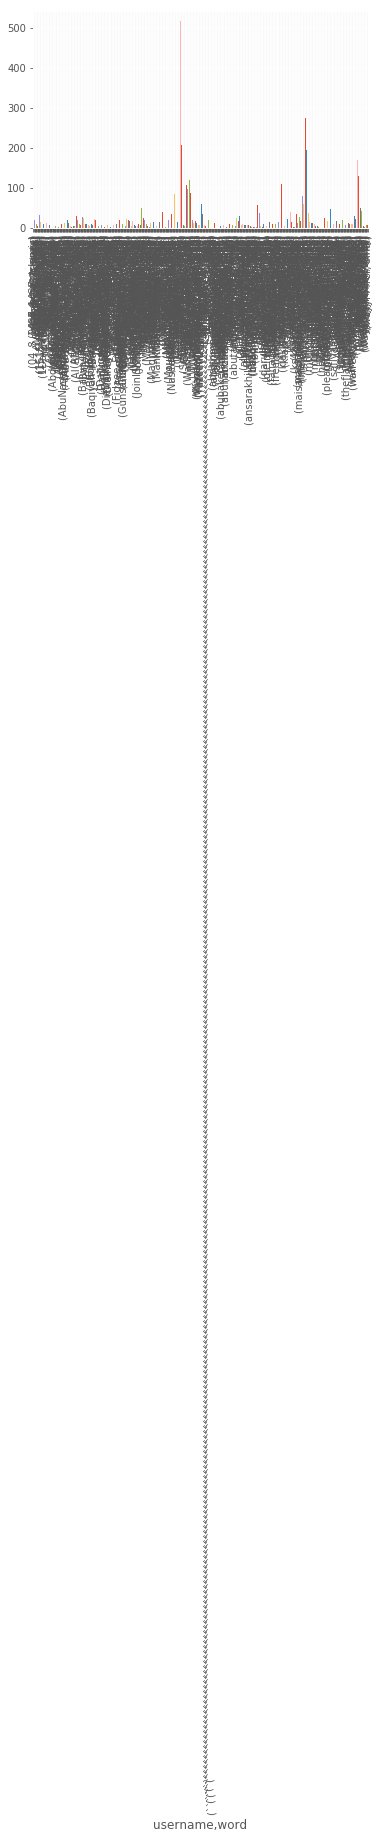

In [42]:
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()

pretty_plot_top_n(counts['n_w'])

In [43]:
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum

,n_d
username,
04_8_1437,611
06230550_IS,652
1515Ummah,1047
1Dawlah_III,846
432Mryam,369
ALK___226,328
Abdul__05,15
AbdusMujahid149,372
AbuLaythAlHindi,120


In [44]:
tf = counts.join(word_sum)

tf['tf'] = tf.n_w/tf.n_d

tf.head()

n_w  n_d        tf
username  word                          
04_8_1437 amaqagency   43  611  0.070376
          islamic      20  611  0.032733
          state        20  611  0.032733
          force        13  611  0.021277
          iraqi        11  611  0.018003

tf
username     word                     
04_8_1437    amaqagency       0.070376
             islamic          0.032733
             state            0.032733
             force            0.021277
             iraqi            0.018003
06230550_IS  amp              0.016871
             http             0.009202
             islamic          0.009202
             state            0.009202
             like             0.007669
1515Ummah    isi              0.031519
             http             0.015282
             malle111elf      0.013372
             islamicstate     0.012416
             killed           0.011461
1Dawlah_III  city             0.039007
             mosul            0.011820
             wilayatninawa    0.011820
             work             0.010638
             aspect           0.009456
432Mryam     khair            0.037940
             upp0rt           0.037940
             jazakallah       0.035230
             blvrnasiha       0.027100
             ukhti            0.024390
ALK___226    دعم              0.036585
             أعماق            0.021341
             وكالة            0.021341
             amaqagency       0.018293
             الله             0.018293
...                                ...
war_analysis isi              0.022571
             ramiallolah      0.015702
             nidalgazaui      0.010795
             syria            0.009814
             aleppo           0.008832
warreporter2 didyouknowvs     0.037076
             http             0.018799
             thevictoryseri4  0.015666
             know             0.013055
             isi              0.011488
warrnews     isi              0.017073
             nidalgazaui      0.015324
             killed           0.014242
             syria            0.012826
             aleppo           0.010744
wayf44rerr   killed           0.020371
             today            0.016245
             airstrikes       0.013151
             sinai            0.013151
             army             0.011088
wayff44rer   egyptian         0.029197
             explosion        0.029197
             sinai            0.029197
             targeted         0.029197
             airstrikes       0.021898
wayyf44rer   today            0.020701
             airstrikes       0.017516
             killed           0.012739
             army             0.011146
             sinai            0.011146

[560 rows x 1 columns]

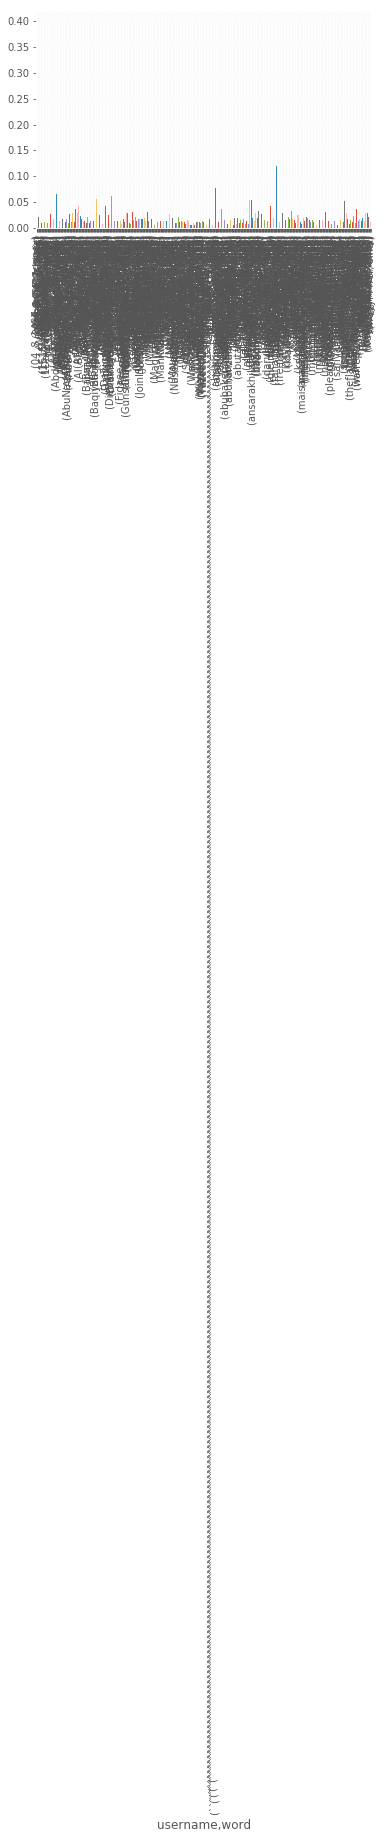

In [45]:
# We should do this only for the most important users
pretty_plot_top_n(tf['tf'])

In [46]:
c_d = tweets_words.username.nunique()
c_d

112

In [47]:
idf = tweets_words.groupby('word')\
    .username\
    .nunique()\
    .to_frame()\
    .rename(columns={'username':'i_d'})\
    .sort_values('i_d')
idf.head()

,i_d
word,
0,1
mak,1
majuj,1
majorité,1
majoritairement,1


In [48]:
idf['idf'] = np.log(c_d/idf.i_d.values)

idf.head()

,i_d,idf
word,,
0,1,4.718499
mak,1,4.718499
majuj,1,4.718499
majorité,1,4.718499
majoritairement,1,4.718499


In [49]:
tf_idf = tf.join(idf)

tf_idf.head()

n_w  n_d        tf  i_d       idf
username  word                                         
04_8_1437 amaqagency   43  611  0.070376   36  1.134980
          islamic      20  611  0.032733   89  0.229863
          state        20  611  0.032733   88  0.241162
          force        13  611  0.021277   73  0.428039
          iraqi        11  611  0.018003   76  0.387766

In [50]:
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head()

n_w  n_d        tf  i_d       idf    tf_idf
username  word                                                   
04_8_1437 amaqagency   43  611  0.070376   36  1.134980  0.079876
          islamic      20  611  0.032733   89  0.229863  0.007524
          state        20  611  0.032733   88  0.241162  0.007894
          force        13  611  0.021277   73  0.428039  0.009107
          iraqi        11  611  0.018003   76  0.387766  0.006981

tf_idf
username     word                      
04_8_1437    amaqagency        0.079876
             8                 0.046336
             khilafahnews      0.027227
             rigged            0.021815
             1437              0.021148
06230550_IS  loool             0.015332
             35million         0.014474
             afghanrace        0.014474
             maslahat          0.014474
             preaches          0.014474
1515Ummah    malle111elf       0.053825
             wayf44rer         0.018460
             lililllililli     0.018027
             ankara            0.013441
             albarida          0.011534
1Dawlah_III  wilayataljazirah  0.025725
             wilayatninawa     0.023764
             wilayatalbarakah  0.021394
             wilayatarraqqah   0.020862
             wilayatdimashq    0.020757
432Mryam     upp0rt            0.152723
             blvrnasiha        0.127873
             jazakallah        0.064406
             ukhti             0.061494
             khair             0.058445
ALK___226    دعم               0.132435
             وكالة             0.045960
             أعماق             0.044378
             اخي               0.037915
             خيرا              0.035692
...                                 ...
war_analysis maghrebiwt        0.019794
             shamibritaani     0.018522
             adamhasakah112    0.013892
             khorasan15        0.013892
             nidalgazaui       0.013191
warreporter2 didyouknowvs      0.134210
             thevictoryseri4   0.063060
             revelation        0.017013
             victorynewshd     0.017013
             maghrebimwss      0.014714
warrnews     nidalgazaui       0.018726
             gaza              0.012469
             hamas             0.012092
             warnews24         0.009722
             militant          0.008118
wayf44rerr   zuwaid            0.020622
             mozlemgurl        0.019763
             sinai             0.017770
             rafahh            0.012030
             explosion         0.011988
wayff44rer   rafahh            0.072968
             searcherv         0.058764
             assukhna          0.045388
             explosion         0.043785
             sinai             0.039451
wayyf44rer   alqaryatayn       0.023302
             gthe              0.022541
             kyrgyzstan        0.022541
             zuwaid            0.021224
             wwayyf44rer       0.016059

[560 rows x 1 columns]

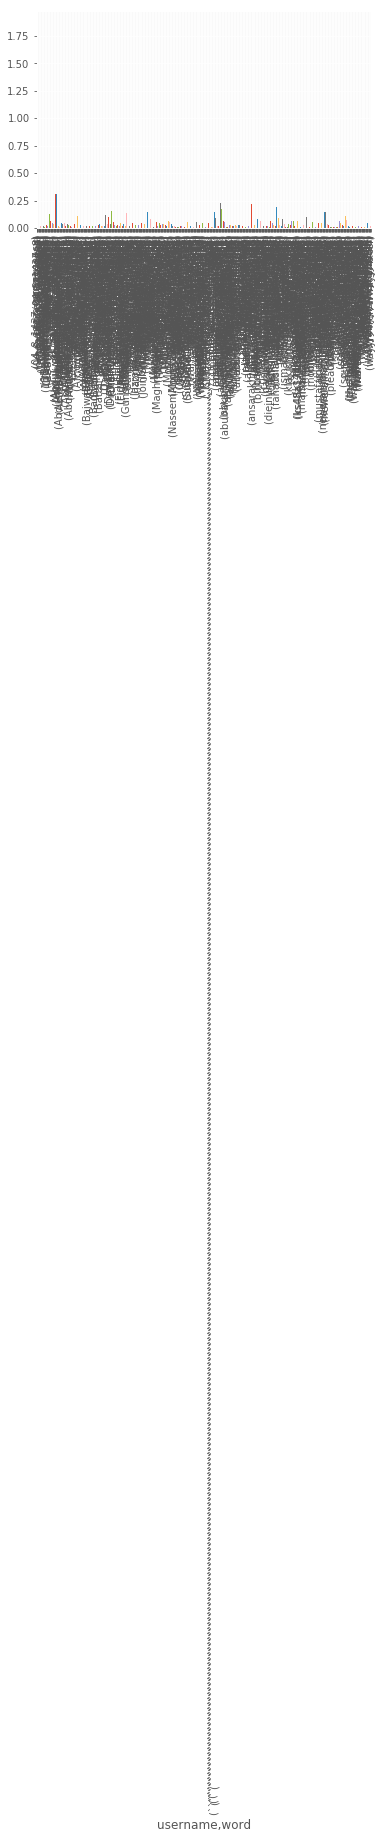

In [51]:
# We should do this only for the most important users
pretty_plot_top_n(tf_idf['tf_idf'])

**3. Tokenization**:
- Word split
- Sentiment analysis
- Deepmoji

**Word split **

In [52]:
# Version 1.1 Tokenization Split: Tokenize sentences into words: split into words
data['tweets_tok1'] = data.tweets_prepr.str.strip().str.split('[\W_]+')
data['tweets_tok1'].head()

0    [message, truthful, syria, sheikh, abu, muhamm...
1    [sheikh, fatih, jawlani, people, integrity, sa...
2    [first, audio, meeting, sheikh, fatih, jawlani...
3    [sheikh, nasir, wuhayshi, leader, aqap, promis...
4    [aqap, response, sheikh, baghdadis, statement,...
Name: tweets_tok1, dtype: object

In [53]:
# Version 1.2 Tokenization NLTK1: Tokenize sentences into words: split into words
tweet_tokenizer = nltk.tokenize.casual.TweetTokenizer()
data['tweets_tok2'] = data['tweets_prepr'].apply(tweet_tokenizer.tokenize)
data['tweets_tok2'].head()

0    [message, truthful, syria, sheikh, abu, muhamm...
1    [sheikh, fatih, jawlani, people, integrity, sa...
2    [first, audio, meeting, sheikh, fatih, jawlani...
3    [sheikh, nasir, wuhayshi, leader, aqap, promis...
4    [aqap, response, sheikh, baghdadis, statement,...
Name: tweets_tok2, dtype: object

**Sentiment analysis **

**Deepmoji **

In [54]:
## clone the repository
! git clone https://github.com/huggingface/torchMoji.git

fatal: destination path 'torchMoji' already exists and is not an empty directory.


In [55]:
## download the pretrain# navigate to the torchmoji folder
! torchMoji/scripts/download_weights.py

'torchMoji' is not recognized as an internal or external command,
operable program or batch file.


In [56]:
# navigate to the torchmoji folder
import os
#os.chdir('torchMoji')
## install dependencies
! pip install -e .

Directory '.' is not installable. File 'setup.py' not found.


In [57]:
# add to sys.path
import sys
base_path = '' # change if you have downloaded folder elsewhere.
#base_path = '/mnt/b0c8e396-e5ba-4614-be6f-146c4c861ab3/torchMoji/' ## path to the torchmoji directory
#sys.path.insert(0, base_path)


In [58]:
## Load model and tokenizer
from torchmoji.sentence_tokenizer import SentenceTokenizer
# load the deepmoji encoder that transforms text to emojies.
from torchmoji.model_def import torchmoji_emojis
from torchmoji.global_variables import PRETRAINED_PATH, VOCAB_PATH
import json,csv, numpy as np
import warnings; warnings.simplefilter('ignore')


## set the max context length
max_token = 30 ## This will not work for longer texts,
################# here you should consider splitting each text into smaller segments.

# Load vocab (i.e. the index of each word in the vector representation)
with open(VOCAB_PATH, 'r') as f:
    vocabulary = json.load(f)

# initialize tokenizer
sentence_tokenizer = SentenceTokenizer(vocabulary, max_token)
# load model
model = torchmoji_emojis(PRETRAINED_PATH)

ModuleNotFoundError: No module named 'torchmoji'

In [59]:
with open(base_path+'data/emoji_codes.json') as f:
    emoji_desc = json.load(f)
list(emoji_desc.items())[0:10]

FileNotFoundError: [Errno 2] No such file or directory: 'data/emoji_codes.json'

In [60]:
import emoji
def translate_emoji(emoji_descr):
    if emoji_descr in emoji.unicode_codes.EMOJI_ALIAS_UNICODE:
        return emoji.unicode_codes.EMOJI_ALIAS_UNICODE[emoji_descr]
    if emoji_descr in emoji.unicode_codes.EMOJI_UNICODE:
        return emoji.unicode_codes.EMOJI_UNICODE[emoji_descr]
    return emoji_descr
to_emoji = [translate_emoji(desc) for i,desc in sorted(emoji_desc.items(),key=lambda x: int(x[0]))]
to_emoji_desc = [desc for i,desc in sorted(emoji_desc.items(),key=lambda x: int(x[0]))]

## index 
to_emoji[0],to_emoji_desc[0]

ModuleNotFoundError: No module named 'emoji'